In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [13]:
# Load the dataset
data = pd.read_csv('google_stock_prices.csv')

# Preprocess the dataset
# Perform any necessary data cleaning and feature engineering steps here
# Ensure the dataset contains the necessary columns (e.g., 'Date', 'Close')


In [16]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['close'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Reshape the data for the RNN input shape
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


In [17]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=32)



Epoch 1/20
3/3 [==============================] - 3s 11ms/step - loss: 0.0760
Epoch 2/20
3/3 [==============================] - 0s 11ms/step - loss: 0.0210
Epoch 3/20
3/3 [==============================] - 0s 13ms/step - loss: 0.0114
Epoch 4/20
3/3 [==============================] - 0s 11ms/step - loss: 0.0182
Epoch 5/20
3/3 [==============================] - 0s 12ms/step - loss: 0.0093
Epoch 6/20
3/3 [==============================] - 0s 13ms/step - loss: 0.0086
Epoch 7/20
3/3 [==============================] - 0s 11ms/step - loss: 0.0129
Epoch 8/20
3/3 [==============================] - 0s 11ms/step - loss: 0.0140
Epoch 9/20
3/3 [==============================] - 0s 13ms/step - loss: 0.0115
Epoch 10/20
3/3 [==============================] - 0s 12ms/step - loss: 0.0086
Epoch 11/20
3/3 [==============================] - 0s 12ms/step - loss: 0.0076
Epoch 12/20
3/3 [==============================] - 0s 11ms/step - loss: 0.0081
Epoch 13/20
3/3 [==============================] - 0s 12ms/st

1/1 [==============================] - 0s 26ms/step


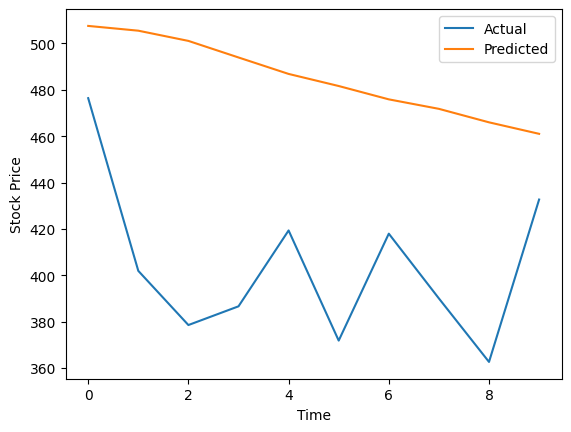

In [19]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Visualize the predictions
plt.plot(data['close'].values[train_size+sequence_length:], label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
